# 2110010114  李佳琪

## 一，决策树
1. 将信用数据集按照7：3的比例划分为训练集和测试集；
2. 使用训练数据集训练决策树模型，并对测试数据集中的信用违约状态进行分类；
3. 练习调节DecisionTreeClassifier()中的参数，包括criterion、max_depth、min_samples_split、min_samples_leaf和max_features，
   尝试获取最好的分类准确率；
4. 使用plot_tree()画出决策树结构，树的高度设置为4；
5. 使用feature_importances_计算特征的重要性程度，并画出特征重要性程度的柱状图；
6. 使用网格搜索对决策树的参数进行寻优，找到最优的参数组合，并对测试集的样本进行分类预测。

In [22]:
#导入包
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 读取信用数据集
file_path = 'D:\\大三上\\数据挖掘与商务智能\\第五次上机作业\\信用数据集.xlsx'  
df = pd.read_excel(file_path)

# 提取特征和标签
X = df[['loan_amnt', 'int_rate', 'total_pymnt', 'last_pymnt_amnt']]
# 在 DecisionTreeClassifier 中使用字符串的类别标签
y = df['loan_status'].astype(str)

In [24]:
# 将信用数据集按照7：3的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# 初始化决策树模型
dt_classifier = DecisionTreeClassifier()

In [27]:
# 定义参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 使用GridSearchCV进行参数搜索
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

F:\anaconda\exe\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "F:\anaconda\exe\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\anaconda\exe\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "F:\anaconda\exe\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "F:\anaconda\exe\Lib\site-packages\sklearn\utils\_param_validation.py", line

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [28]:
# 打印最佳参数组合
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 使用最佳参数重新训练模型
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10)

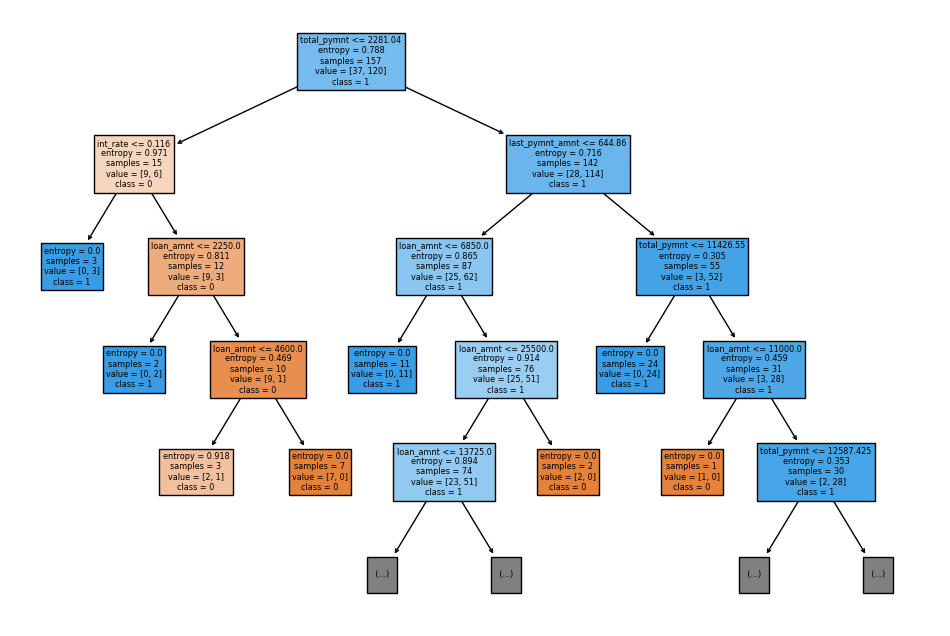

In [29]:
# 画出决策树结构
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=y.unique().tolist(), max_depth=4)
plt.show()

In [30]:
# 计算特征的重要性程度
feature_importance = best_dt_classifier.feature_importances_

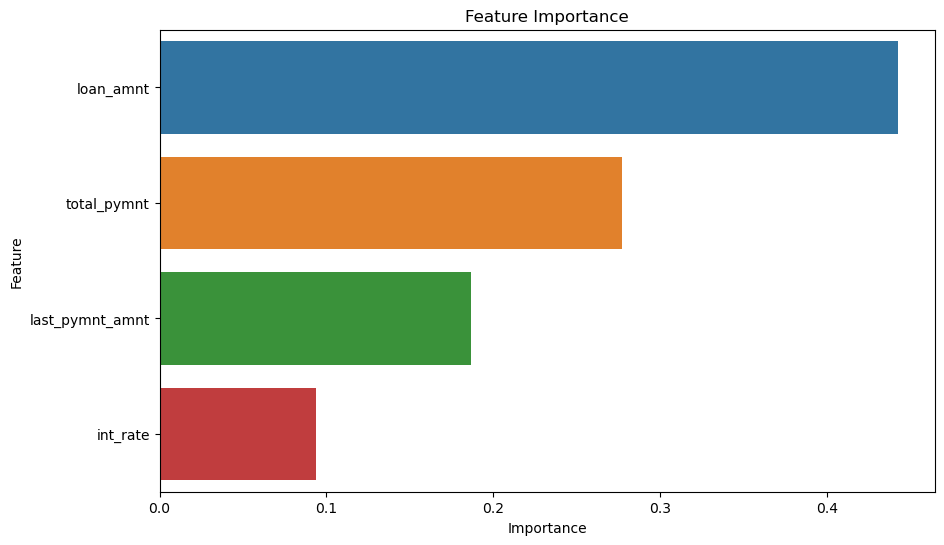

In [31]:
# 创建DataFrame以便画出柱状图
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 画出特征重要性程度的柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [32]:
# 在测试集上进行预测
y_pred = best_dt_classifier.predict(X_test)

# 打印模型在测试集上的准确率
accuracy = (y_pred == y_test).mean()
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8088235294117647


## 二，KNN
1. 将信用数据集按照7：3的比例划分为训练集和测试集；
2. 使用训练数据集训练KNN模型，并对测试数据集中的信用违约状态进行分类。


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# 读取信用数据集
file_path = 'D:\\大三上\\数据挖掘与商务智能\\第五次上机作业\\信用数据集.xlsx'  
df = pd.read_excel(file_path)

# 提取特征和标签
X = df[['loan_amnt', 'int_rate', 'total_pymnt', 'last_pymnt_amnt']]
# 在 DecisionTreeClassifier 中使用字符串的类别标签
y = df['loan_status'].astype(str)

In [35]:
# 将信用数据集按照7：3的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# 初始化KNN模型
knn_classifier = KNeighborsClassifier()

# 训练KNN模型
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# 在测试集上进行预测
y_pred = knn_classifier.predict(X_test)

# 打印模型在测试集上的准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.7352941176470589


In [38]:
# 打印分类报告
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.15      0.18        13
           1       0.81      0.87      0.84        55

    accuracy                           0.74        68
   macro avg       0.52      0.51      0.51        68
weighted avg       0.70      0.74      0.72        68



## 三，朴素贝叶斯
1. 将信用数据集按照7：3的比例划分为训练集和测试集；
2. 使用训练数据集训练朴素贝叶斯模型，并对测试数据集中的信用违约状态进行分类。

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 读取信用数据集
file_path = 'D:\\大三上\\数据挖掘与商务智能\\第五次上机作业\\信用数据集.xlsx'  
df = pd.read_excel(file_path)

# 提取特征和标签
X = df[['loan_amnt', 'int_rate', 'total_pymnt', 'last_pymnt_amnt']]
# 在 DecisionTreeClassifier 中使用字符串的类别标签
y = df['loan_status'].astype(str)
# 将信用数据集按照7：3的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# 初始化朴素贝叶斯模型 (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# 训练朴素贝叶斯模型
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [41]:
# 在测试集上进行预测
y_pred = nb_classifier.predict(X_test)

# 打印模型在测试集上的准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.4411764705882353


In [42]:
# 打印分类报告
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.92      0.39        13
           1       0.95      0.33      0.49        55

    accuracy                           0.44        68
   macro avg       0.60      0.63      0.44        68
weighted avg       0.81      0.44      0.47        68

